## Marciniak, Duncan, and Hu (2002): Mechanics of Sheet Metal Forming.
### (Worked example) 2D stamping

<img src="Fig4.2.png" alt="Stamping" width="400"/>

Figure 4.2. Simple draw die with the punch face having a circular profile.

<img src="Fig4.3.png" alt="Stamping" width="600"/>

Figure 4.3. Half-section of a partially drawn strip in the die shown in Figure 4.2.

Drawing quality steel of 0.8 mm thickness is formed in a stamping die as shown in Figure 4.3 but with vertical side walls. The plane strain stress–strain relation is
$$
\sigma_1 = 750 \varepsilon_1^{0.23} \text{ MPa}
$$

In the two-dimensional plane strain model, the variables are:
 - Semi punch width: $a$ = 330 mm
 - Punch face radius: $R_f$ = 2800 mm
 - Corner radius: $R_p$, $R_d$ = 10 mm
 - Side wall length: $s_\text{BC}$ = 28 mm
 - Land width: $s_\text{DE}$ = 0 mm
 - Clamp width: $s_\text{EF}$ = 80 mm

1. Estimate the blankholder force per side, per unit width, to achieve a strain $\varepsilon_{1,\text{O}} = 0.03$ at the centre if the friction coefficient is 0.1.
2. If $s$ is the arc length measured along the deformed sheet in the above condition, prepare diagrams in which the horizontal axes are each $s$, and the vertical axes are:
 1. the membrane strain $\varepsilon_1$,
 2. sheet thickness,
 3. the tension $T_1$ in kN/m, and
 4. the contact pressure.    
3. If in the condition shown, the edge of the sheet just comes to the point $F$, estimate approximately the initial semi blank width.
4. If, in the position shown, the side wall is about to split, estimate the punch force $P$ and the strain at the centre $\varepsilon_{1,\text{O}}$.


### Example in Python

Known data:

In [1]:
import math

t0 = 0.8
thetaOB = math.pi/2
K = 750
n = 0.23
s1 = lambda e1: K*e1**n   # material behaviour as a function of strain e1
a = 330
Rf = 2800
Rp = 10
Rd = 10
sBC = 28
sDE = 0
sEF = 80
e1O = 0.03
mu = 0.1

#### Tension at the centreline

$$
T_{1,\text{O}} = {[\sigma_{1} t]}_\text{O} = K (\varepsilon_{1,\text{O}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{O}})}
$$

In [2]:
s1O = s1(e1O)
e3O = -e1O
tO = t0*math.exp(e3O)
T1O = s1O*tO
print('s1 = %0.1f MPa, t = %0.3f mm --> T1 = %0.0f kN/m' % (s1O, tO, T1O))

s1 = 334.8 MPa, t = 0.776 mm --> T1 = 260 kN/m


#### Dimensions of each zone:

- Zone OA:
$
R_f \sin \theta_{\text{OA}} = a-R_p \quad\rightarrow\quad
\theta_{\text{OA}} = \arcsin \frac{a-R_p}{R_f} \quad\rightarrow\quad
s_{\text{OA}} = R_f \, \theta_{\text{OA}}
$

- Zone AB:
$
\theta_{\text{OB}} = \pi/2  \quad\rightarrow\quad
\theta_{\text{AB}} = \pi/2 - \theta_{\text{OA}} \quad\rightarrow\quad
s_{\text{AB}} = R_p (\pi/2 - \theta_{\text{OA}})
$

- Zone BC:
$
s_{\text{BC}} = 28\text{ mm}
$

- Zone CD:
$
\theta_{\text{DC}} = \theta_{\text{OB}} = \pi/2  \quad\rightarrow\quad
s_{\text{CD}} = R_d \, \pi/2
$

- Zone DE:
$
s_{\text{DE}} = 0\text{ mm}
$

- Zone EF:
$
s_{\text{EF}} = 80\text{ mm}
$

In [3]:
thetaOA = math.asin((a-Rp)/Rf)
sOA = Rf*thetaOA
print('Zone OA: %0.3f rad (%0.1f°), %.0f mm' % (thetaOA, thetaOA*180/3.1416, sOA))
thetaAB = thetaOB - thetaOA
sAB = Rp*thetaAB
print('Zone AB: %0.3f rad (%0.1f°), %.0f mm' % (thetaAB, thetaAB*180/3.1416, sAB))
print('Zone BC: %s mm' % sBC)
thetaDC = thetaOB
sCD = Rd*thetaDC
print('Zone CD: %.0f mm' % sCD)
print('Zone DE: %s mm' % sDE)
print('Zone EF: %s mm' % sEF)
s_total = sOA+sAB+sBC+sCD+sDE+sEF
print('Total lenght= %0.0f mm' % s_total)

Zone OA: 0.115 rad (6.6°), 321 mm
Zone AB: 1.456 rad (83.4°), 15 mm
Zone BC: 28 mm
Zone CD: 16 mm
Zone DE: 0 mm
Zone EF: 80 mm
Total lenght= 459 mm


#### Tension

The tension at one end k of a curved section of sheet is found from longitudinal equilibrium as:
$$
T_{1,\text{k}} = T_{1,\text{j}} \exp (\mu\,\theta_\text{jk})
$$
where j is the other end of the section and $\theta_\text{jk}$ is the angle between both ends.

$$
\begin{aligned}
T_{1,\text{A}} = & T_{1,\text{O}} \exp (\mu\,\theta_{\text{OA}}) \\
T_{1,\text{B}} = & T_{1,\text{O}} \exp (\mu\,\theta_{\text{OB}}) = T_{1,\text{O}} \exp (\mu\,\pi/2) \\
T_{1,\text{C}} = & T_{1,\text{B}} \\
T_{1,\text{D}} = & T_{1,\text{C}} \exp (\mu\,\theta_{\text{CD}}) = T_{1,\text{C}} \exp (-\mu\,\pi/2) \\
T_{1,\text{E}} = & T_{1,\text{D}} \\
T_{1,\text{F}} = & 0
\end{aligned}
$$

In [4]:
T1A = T1O*math.exp(mu*thetaOA)
print('T1A = %.0f kN/m' % T1A)
T1B = T1O*math.exp(mu*3.1416/2)
print('T1B = %.0f kN/m' % T1B)
T1C = T1B
print('T1C = %.0f kN/m' % T1C)
T1D = T1C*math.exp(-mu*thetaDC)
print('T1D = %.0f kN/m' % T1D)
T1E = T1D
print('T1E = %.0f kN/m' % T1E)
T1F = 0
print('T1F = %.0f kN/m' % T1F)

T1A = 263 kN/m
T1B = 304 kN/m
T1C = 304 kN/m
T1D = 260 kN/m
T1E = 260 kN/m
T1F = 0 kN/m


#### Tension distribution along the sheet

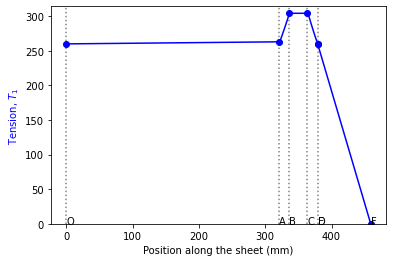

In [5]:
from stamping_example import *

params = [Rf, Rp, Rd, mu, K, n, t0]
length = [sOA, sAB, sBC, sCD, sDE, sEF]
theta = [thetaOA, thetaAB, thetaOB, thetaDC]
tension = [T1O, T1A, T1B, T1C, T1D, T1E, T1F]
plot_T1(params, length, theta, tension)

#### Blankholder force:
$$
T_{1,\text{E}} = 2\mu B \quad\rightarrow\quad B = \frac{T_{1,\text{E}}}{2\mu}
$$

In [6]:
B = T1E/(2*mu)
print('B = %.0f kN/m' % B)

B = 1300 kN/m


#### Punch force:
$$
F = 2 \, T_{1,\text{B}} \sin{\theta_{\text{OB}}}
$$

In [7]:
F = 2*T1B*math.sin(thetaOB)
print('F = %.0f kN/m' % F)

F = 608 kN/m


#### Strains:
The strain distribution $\varepsilon_{1}$ in a curved sheet zone corresponding to the tension distribution $T_1$ can be found from:
$$
T_{1} = K \varepsilon_{1}^n \cdot t_0 \exp{(-\varepsilon_{1})}
$$
This equation shows that $\varepsilon_1$ must be found by a numerical solution. A simple method is by trial and error:

1. Suppose $\varepsilon_1^*$
2. Calculate $T_1^*$ from equation above.
3. If $T_1^* \neq T_1$, repeat step 1.

The calculation procedure must be applied at each end of the curved sections of sheet metal:
$$
\begin{aligned}
T_{1,\text{A}} = & K (\varepsilon_{1,\text{A}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{A}})} & \quad\rightarrow\quad \varepsilon_{1,\text{A}} \\
T_{1,\text{B}} = & K (\varepsilon_{1,\text{B}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{B}})} & \quad\rightarrow\quad \varepsilon_{1,\text{B}} \\
T_{1,\text{C}} = & T_{1,\text{B}} & \quad\rightarrow\quad \varepsilon_{1,\text{C}}=\varepsilon_{1,\text{B}} \\
T_{1,\text{D}} = & K (\varepsilon_{1,\text{D}})^n \cdot t_0 \exp{(-\varepsilon_{1,\text{D}})} & \quad\rightarrow\quad \varepsilon_{1,\text{D}} \\
T_{1,\text{E}} = & T_{1,\text{D}} & \quad\rightarrow\quad \varepsilon_{1,\text{E}}=\varepsilon_{1,\text{D}}
\end{aligned}
$$

However, in this notebook we will use the Python library [Scipy](https://www.scipy.org/) to solve the equations.


In [8]:
from scipy.optimize import fsolve

funcT1 = lambda x : s1(x)*t0*math.exp(-x)
funcA = lambda x : T1A - funcT1(x)
funcB = lambda x : T1B - funcT1(x)
funcD = lambda x : T1D - funcT1(x)
e1A = fsolve(funcA, e1O)
e1B = fsolve(funcB, e1A)
e1C = e1B
e1D = fsolve(funcD, e1C)
e1E = e1D
e1F = 0
print('e1A = %.3f \t --> Checking: T1A = %0.1f kN/m' % (e1A, funcT1(e1A)))
print('e1B = %.3f \t --> Checking: T1B = %0.1f kN/m' % (e1B, funcT1(e1B)))
print('e1C = %.3f' % e1C)
print('e1D = %.3f \t --> Checking: T1D = %0.1f kN/m' % (e1D, funcT1(e1D)))
print('e1E = %.3f' % e1E)
print('e1F = %.3f' % e1F)

e1A = 0.032 	 --> Checking: T1A = 262.9 kN/m
e1B = 0.071 	 --> Checking: T1B = 304.1 kN/m
e1C = 0.071
e1D = 0.030 	 --> Checking: T1D = 259.9 kN/m
e1E = 0.030
e1F = 0.000


#### Strain and thickness distribution along the sheet

/home/domi/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


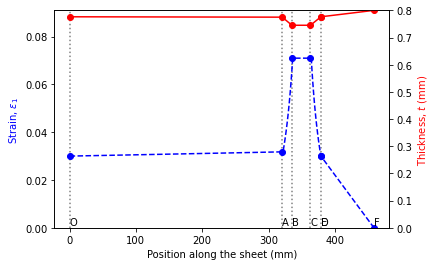

In [9]:
strain = [e1O, e1A, e1B, e1C, e1D, e1E, e1F]
thickness = [t0*math.exp(-e) for e in strain]
plot_strain(params, length, theta, tension, strain, thickness)

#### Contact pressure

The contact pressure in a curved section is found from radial equilibrium as:
$$
p = \frac{T_1}{R}
$$


- Zone OA:
$
p_\text{O} = \frac{T_{1,\text{O}}}{R_f} \qquad
p_\text{A} = \frac{T_{1,\text{A}}}{R_f}
$

- Zone AB:
$
p_\text{A} = \frac{T_{1,\text{A}}}{R_p} \qquad
p_\text{B} = \frac{T_{1,\text{B}}}{R_p}
$

- Zone BC:
$
p_\text{B} = 0 \qquad
p_\text{C} = 0
$

- Zone CD:
$
p_\text{C} = \frac{T_{1,\text{C}}}{R_d} \qquad
p_\text{D} = \frac{T_{1,\text{D}}}{R_d}
$

- Zone DE:
$
p_\text{D} = 0 \qquad
p_\text{E} = 0
$

- Zone EF:
$
p_\text{E} = \frac{B}{s_\text{EF}} \qquad
p_\text{F} = \frac{B}{s_\text{EF}}
$

- Outside:
$
p_\text{F} = 0
$


In [10]:
pO = T1O/Rf
pA1 = T1A/Rf
print('Zone OA: pO = %.3f MPa, pA = %.3f MPa' % (pO, pA1))
pA2 = T1A/Rp
pB1 = T1B/Rp
print('Zone BC: pA = %.1f MPa, pB = %.1f MPa' % (pA2, pB1))
pB2 = 0
pC1 = 0
print('Zone CD: pB = pC = 0')
pC2 = T1C/Rp
pD1 = T1D/Rd
print('Zone DE: pC = %.1f MPa, pD = %.1f MPa' % (pC2, pD1))
pD2 = 0
pE1 = 0
print('Zone EF: pD = pE = 0')
pE2 = B/sEF
pF1 = pE2
print('Zone F: pE = %.1f MPa, pF = %.1f MPa' % (pE2, pF1))
pF2 = 0
print('Outside: pF = 0')

Zone OA: pO = 0.093 MPa, pA = 0.094 MPa
Zone BC: pA = 26.3 MPa, pB = 30.4 MPa
Zone CD: pB = pC = 0
Zone DE: pC = 30.4 MPa, pD = 26.0 MPa
Zone EF: pD = pE = 0
Zone F: pE = 16.2 MPa, pF = 16.2 MPa
Outside: pF = 0


#### Pressure distribution along the sheet

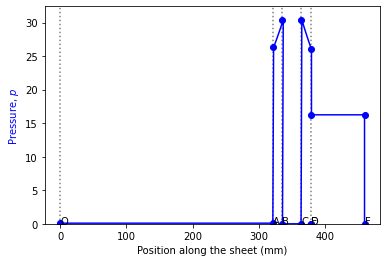

In [11]:
pressure = [pO, pA1, pA2, pB1, pB2, pC1, pC2, pD1, pD2, pE1, pE2, pF1, pF2]
plot_pressure(params, length, theta, tension, pressure)

#### Initial semi-blank width, $w_0$

By volume conservation:
$$
w_0 = \frac{1}{t_0} \sum s_i \, \overline{t_i}
$$

Overall average strain:
$$
\overline{\varepsilon_1} = \ln\frac{\sum s_i}{w_0}
$$


In [12]:
tO, tA, tB, tC, tD, tE, tF = thickness
tOA = (tO+tA)/2
wOA = sOA*tOA/t0
print('Zone OA: s = %.1f mm, t = %.3f mm --> initial length = %.1f mm' % (sOA, tOA, wOA))
tAB = (tA+tB)/2
wAB = sAB*tAB/t0
print('Zone AB: s = %.1f mm, t = %.3f mm --> initial length = %.1f mm' % (sAB, tAB, wAB))
tBC = (tB+tC)/2
wBC = sBC*tBC/t0
print('Zone BC: s = %.1f mm, t = %.3f mm --> initial length = %.1f mm' % (sBC, tBC, wBC))
tCD = (tC+tD)/2
wCD = sCD*tCD/t0
print('Zone CD: s = %.1f mm, t = %.3f mm --> initial length = %.1f mm' % (sCD, tCD, wCD))
tDE = (tD+tE)/2
wDE = sDE*tDE/t0
print('Zone DE: s = %.1f mm, t = %.3f mm --> initial length = %.1f mm' % (sDE, tDE, wDE))
tEF = (tE+tF)/2
wEF = sEF*tEF/t0
print('Zone EF: s = %.1f mm, t = %.3f mm --> initial length = %.1f mm' % (sEF, tEF, wEF))
w0 = wOA + wAB + wBC + wCD + wDE + wEF
print('Original semi-blank width, w0 = %.0f mm ' % w0)
e_average = math.log(s_total/w0)
print('Overall average strain = %.3f' % e_average)

Zone OA: s = 320.7 mm, t = 0.776 mm --> initial length = 310.9 mm
Zone AB: s = 14.6 mm, t = 0.760 mm --> initial length = 13.8 mm
Zone BC: s = 28.0 mm, t = 0.745 mm --> initial length = 26.1 mm
Zone CD: s = 15.7 mm, t = 0.761 mm --> initial length = 14.9 mm
Zone DE: s = 0.0 mm, t = 0.776 mm --> initial length = 0.0 mm
Zone EF: s = 80.0 mm, t = 0.788 mm --> initial length = 78.8 mm
Original semi-blank width, w0 = 445 mm 
Overall average strain = 0.032


#### Sheet instability: localized necking

From:
$$
T_{1} = K \varepsilon_{1}^n \cdot t_0 \exp{(-\varepsilon_{1})}
$$
one obtains:
$$
dT_{1} = 0 \quad\rightarrow\quad \varepsilon_{1}=n
$$

The ultimate side-wall tension can be obtained from:
$$
T_{1,\max} = K n^n \cdot t_0 e^{-n}
$$

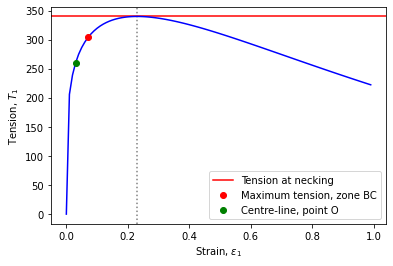

Ultimate side-wall tension at e1 = n = 0.23 --> T1 = 340.0 kN/m
Maximum tension, zone BC: e1 = 0.071, T1 = 304.1 kN/m


In [13]:
T1max = funcT1(n)

fig, ax = plt.subplots()
x = [i/100 for i in range(100)]
y = [funcT1(i) for i in x]
ax.axvline(x=n, color='grey', linestyle=':')
ax.axhline(y=T1max, color='red', linestyle='-', label='Tension at necking')
ax.plot(x, y, 'b-')
ax.plot(e1B, T1B, 'ro', label='Maximum tension, zone BC')
ax.plot(e1O, T1O, 'go', label='Centre-line, point O')
ax.set_xlabel(r'Strain, $\varepsilon_1$')
ax.set_ylabel(r'Tension, $T_1$')
plt.legend()
plt.show()
print('Ultimate side-wall tension at e1 = n = %s --> T1 = %0.1f kN/m' % (n, T1max))
print('Maximum tension, zone BC: e1 = %0.3f, T1 = %0.1f kN/m' % (e1B, T1B))

#### Maximum centre-line strain

The tension at the centre-line is obtained from:
$$
T_{1,\text{B}} = K n^n \cdot t_0 e^{-n} \quad\rightarrow\quad
T_{1,\text{O}} = T_{1,\text{B}}\exp{(-\mu\theta_{\text{OB}})} = T_{1,\text{B}}\exp{(-\mu\pi/2)}
$$

and the strain from:
$$
T_{1,\text{O}} = K (\varepsilon_{1,\text{O}})^n \cdot t_0 \exp{(-\varepsilon_{1\text{O}})} \quad\rightarrow\quad \varepsilon_{1,\text{O}} \\
$$


In [14]:
T1Omax = T1max*math.exp(-mu*3.1416/2)
print('T1max = %.1f MPa --> T1Omax = %.1f MPa' % (T1max, T1Omax))

funcO = lambda x : T1Omax - funcT1(x)
e1Omax = fsolve(funcO, e1O)
print('e1Omax = %.3f' % e1Omax)


T1max = 340.0 MPa --> T1Omax = 290.6 MPa
e1Omax = 0.054


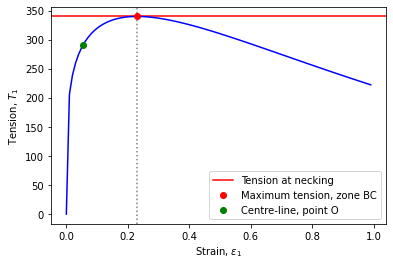

Ultimate side-wall tension at e1 = n = 0.23 --> T1 = 340.0 kN/m
Maximum tension, zone BC: e1 = 0.071, T1 = 304.1 kN/m


In [15]:
fig, ax = plt.subplots()
x = [i/100 for i in range(100)]
y = [funcT1(i) for i in x]
ax.axvline(x=n, color='grey', linestyle=':')
ax.axhline(y=T1max, color='red', linestyle='-', label='Tension at necking')
ax.plot(x, y, 'b-')
ax.plot(n, T1max, 'ro', label='Maximum tension, zone BC')
ax.plot(e1Omax, T1Omax, 'go', label='Centre-line, point O')
ax.set_xlabel(r'Strain, $\varepsilon_1$')
ax.set_ylabel(r'Tension, $T_1$')
plt.legend()
plt.show()
print('Ultimate side-wall tension at e1 = n = %s --> T1 = %0.1f kN/m' % (n, T1max))
print('Maximum tension, zone BC: e1 = %0.3f, T1 = %0.1f kN/m' % (e1B, T1B))